This is my first go through, sorry if it is a bit messy and nonlinear.  Newer versions should be done soon that are cleaner and perform better

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Load data

In [2]:
train = pd.read_csv("../../data/home_default/train.csv")
test  = pd.read_csv("../../data/home_default/test.csv")

print("Shape of train:", train.shape)
print("Shape of test:",  test.shape)

Shape of train: (307511, 122)
Shape of test: (48744, 121)


### Peak at the data

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Check for missing values

In [8]:
missing_cols = [col for col in train.columns if any(train[col].isnull())]
print(train[missing_cols].isnull().sum())

### Look at rows with missing values
train[train.isnull().any(axis=1)].head(3)

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
missing_cols = [col for col in test.columns if any(test[col].isnull())]
print(test[missing_cols].isnull().sum())

### Look at rows with missing values
test[test.isnull().any(axis=1)].head(3)

AMT_ANNUITY                        24
NAME_TYPE_SUITE                   911
OWN_CAR_AGE                     32312
OCCUPATION_TYPE                 15605
EXT_SOURCE_1                    20532
EXT_SOURCE_2                        8
EXT_SOURCE_3                     8668
APARTMENTS_AVG                  23887
BASEMENTAREA_AVG                27641
YEARS_BEGINEXPLUATATION_AVG     22856
YEARS_BUILD_AVG                 31818
COMMONAREA_AVG                  33495
ELEVATORS_AVG                   25189
ENTRANCES_AVG                   23579
FLOORSMAX_AVG                   23321
FLOORSMIN_AVG                   32466
LANDAREA_AVG                    28254
LIVINGAPARTMENTS_AVG            32780
LIVINGAREA_AVG                  23552
NONLIVINGAPARTMENTS_AVG         33347
NONLIVINGAREA_AVG               26084
APARTMENTS_MODE                 23887
BASEMENTAREA_MODE               27641
YEARS_BEGINEXPLUATATION_MODE    22856
YEARS_BUILD_MODE                31818
COMMONAREA_MODE                 33495
ELEVATORS_MO

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


### Merge train and test data

In [12]:
full = pd.concat([train, test])
train_N = len(train)

### See how often target shows up

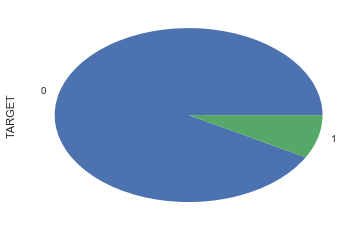

In [14]:
_ = train.TARGET.value_counts().plot(kind="pie")

### Biggest factors

Since this is only the beginning I'm going to choose the most important factors as predictors.  After looking at the correlation map, there doesn't seem to be any good indicators

Index(['TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'OWN_CAR_AGE'],
      dtype='object')


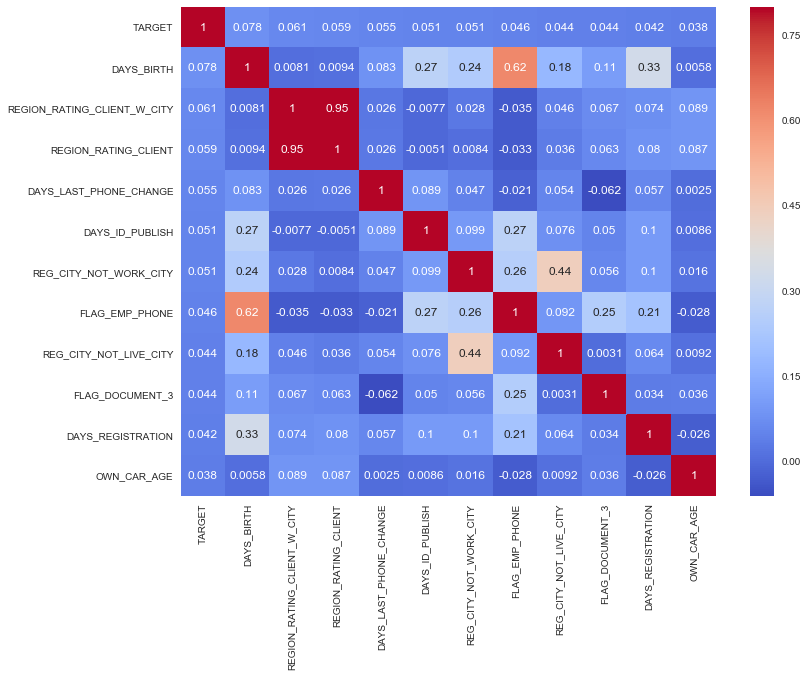

In [19]:
cols = train.corr().nlargest(12, "TARGET").head(12).index
print(cols)
f, ax = plt.subplots(figsize=(12, 9))
_ = sns.heatmap(train[cols].corr(), vmax=.8, cmap="coolwarm", annot=True)

### Select non numeric columns

Maybe the problem is the non numeric columns contain most of the information.  Let's look at those columns a bit and see if we can make them numeric or one hot encode them some way

In [26]:
train.select_dtypes(include=["object"]).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

# Look at the value counts of each

ORGANIZATION_TYPE has a bit too much unique values

TODO: convert these all to seaborn barplots or even better, not a barplot, but something else!

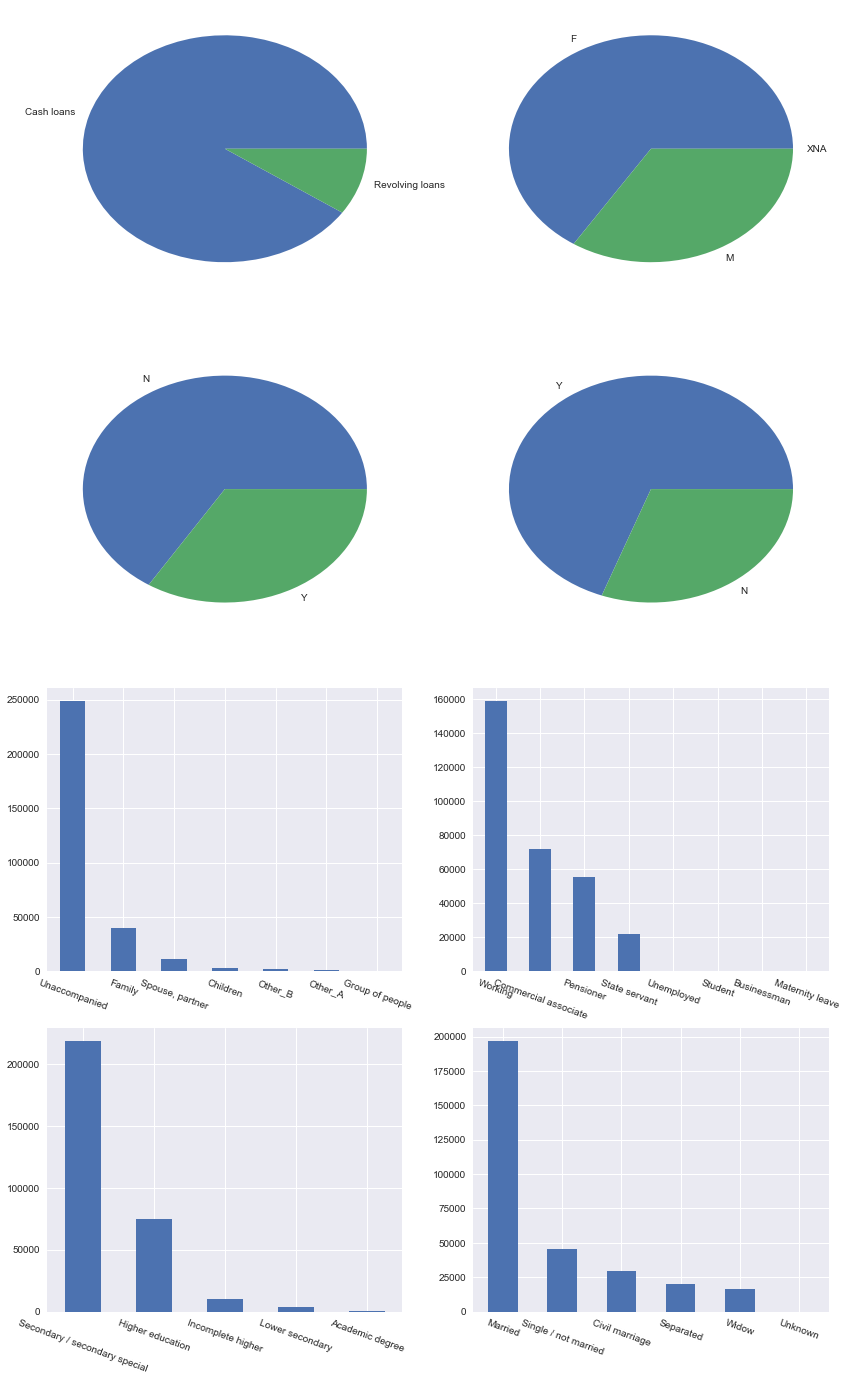

In [58]:
fig, axarr = plt.subplots(4, 2, figsize=(14, 24))

train.NAME_CONTRACT_TYPE.value_counts().plot(kind="pie", ax=axarr[0][0]).set(ylabel="")
train.CODE_GENDER.value_counts().plot(kind="pie", ax=axarr[0][1]).set(ylabel="")
train.FLAG_OWN_CAR.value_counts().plot(kind="pie", ax=axarr[1][0]).set(ylabel="")
train.FLAG_OWN_REALTY.value_counts().plot(kind="pie", ax=axarr[1][1]).set(ylabel="")

train.NAME_TYPE_SUITE.value_counts().plot(kind="bar", rot=-20, ax=axarr[2][0])
train.NAME_INCOME_TYPE.value_counts().plot(kind="bar", rot=-20, ax=axarr[2][1])
train.NAME_EDUCATION_TYPE.value_counts().plot(kind="bar", rot=-20, ax=axarr[3][0])
_ = train.NAME_FAMILY_STATUS.value_counts().plot(kind="bar", rot=-20, ax=axarr[3][1])

### Part 2

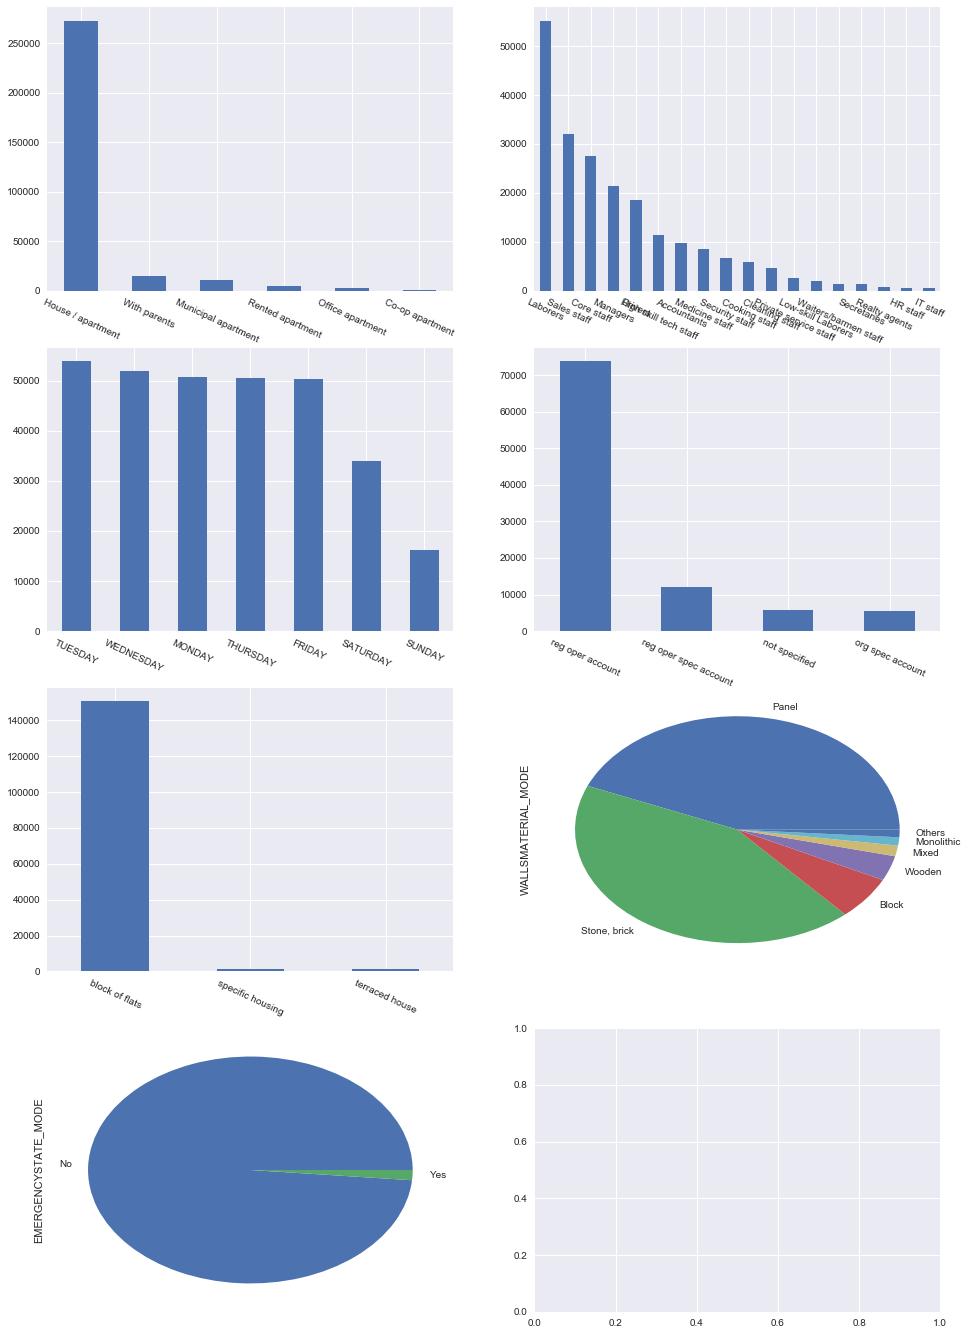

In [59]:
fig, axarr = plt.subplots(4, 2, figsize=(16, 24))

train.NAME_HOUSING_TYPE.value_counts().plot(kind="bar", rot=-25, ax=axarr[0][0])
train.OCCUPATION_TYPE.value_counts().plot(kind="bar", rot=-25, ax=axarr[0][1])
train.WEEKDAY_APPR_PROCESS_START.value_counts().plot(kind="bar", rot=-25, ax=axarr[1][0])
train.FONDKAPREMONT_MODE.value_counts().plot(kind="bar", rot=-25, ax=axarr[1][1])

train.HOUSETYPE_MODE.value_counts().plot(kind="bar", rot=-25, ax=axarr[2][0])
train.WALLSMATERIAL_MODE.value_counts().plot(kind="pie", ax=axarr[2][1])
_ = train.EMERGENCYSTATE_MODE.value_counts().plot(kind="pie", ax=axarr[3][0])

### Create dummy variables

In [62]:
train = pd.get_dummies(train)

### Now look at the corr map again

Index(['TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_M', 'DAYS_ID_PUBLISH',
       'REG_CITY_NOT_WORK_CITY',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY'],
      dtype='object')


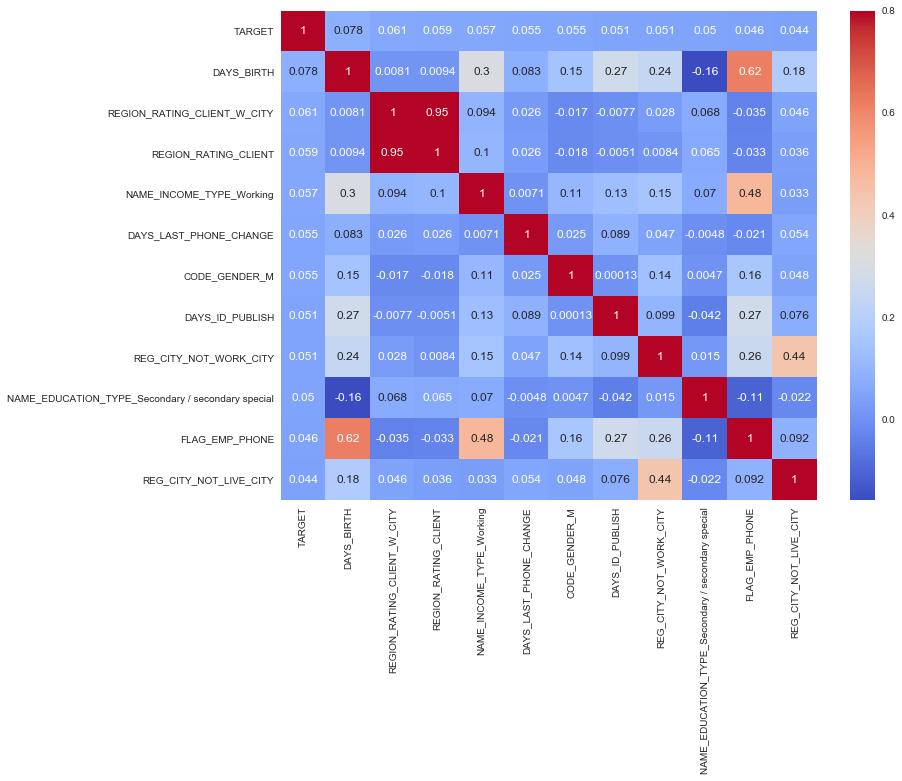

In [63]:
cols = train.corr().nlargest(12, "TARGET").head(12).index
print(cols)
f, ax = plt.subplots(figsize=(12, 9))
_ = sns.heatmap(train[cols].corr(), vmax=.8, cmap="coolwarm", annot=True)

### Okay get down to business

In [64]:
train = pd.read_csv("../../data/home_default/train.csv")
test  = pd.read_csv("../../data/home_default/test.csv")
full = pd.concat([train, test])
train_N = len(train)

### Fill categorical NaN

In [65]:
for col in ('NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'):
    full[col] = full[col].fillna(full[col].mode()[0])

### Fill numeric NaN

In [66]:
missing_cols = [col for col in full.columns if any(full[col].isnull())]
for col in missing_cols:
    full[col] = full[col].fillna(full[col].median())

### Confirm missing values are gone

In [70]:
full.isnull().sum().sum()

0

### Get dummies

In [71]:
full = pd.get_dummies(full)

### Separate data back into train and test

In [72]:
train = full[:train_N]
test = full[train_N:]
full.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0


### Split again into predictors, target, and id

In [80]:
train_y = train.TARGET
train_x = train.drop(["TARGET", "SK_ID_CURR"], axis=1)

test_id = test.SK_ID_CURR
test_x  = test.drop(["TARGET", "SK_ID_CURR"], axis=1)

### To start, a LGBM

In [81]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(train_x, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

### Get predictions

In [82]:
predictions = model.predict(test_x)

### Save file to CSV

In [84]:
pd.DataFrame({
    "SK_ID_CURR": test_id,
    "TARGET": predictions
}).to_csv("../../submissions/default_start.csv", index=False)